In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm, metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
data = pd.read_csv('./Heart.csv')

In [3]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,typical,110,264,0,0,132,0,1.2,2,0.0,reversable,Yes
299,300,68,1,asymptomatic,144,193,1,0,141,0,3.4,2,2.0,reversable,Yes
300,301,57,1,asymptomatic,130,131,0,0,115,1,1.2,2,1.0,reversable,Yes
301,302,57,0,nontypical,130,236,0,2,174,0,0.0,2,1.0,normal,Yes


In [4]:
data['ChestPain'],_ = pd.factorize(data['Thal'])
data['Thal'],_ = pd.factorize(data['Thal'])
data['AHD'],class_names = pd.factorize(data['AHD'])

In [5]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,1,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,2,110,264,0,0,132,0,1.2,2,0.0,2,1
299,300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,2,1
300,301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,2,1
301,302,57,0,1,130,236,0,2,174,0,0.0,2,1.0,1,1


In [6]:
print(data['AHD'].value_counts())

0    164
1    139
Name: AHD, dtype: int64


In [7]:
data = data.dropna()

In [8]:
data

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,0,145,233,1,2,150,0,2.3,3,0.0,0,0
1,2,67,1,1,160,286,0,2,108,1,1.5,2,3.0,1,1
2,3,67,1,2,120,229,0,2,129,1,2.6,2,2.0,2,1
3,4,37,1,1,130,250,0,0,187,0,3.5,3,0.0,1,0
4,5,41,0,1,130,204,0,2,172,0,1.4,1,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,298,57,0,2,140,241,0,0,123,1,0.2,2,0.0,2,1
298,299,45,1,2,110,264,0,0,132,0,1.2,2,0.0,2,1
299,300,68,1,2,144,193,1,0,141,0,3.4,2,2.0,2,1
300,301,57,1,2,130,131,0,0,115,1,1.2,2,1.0,2,1


0    161
1    138
Name: AHD, dtype: int64


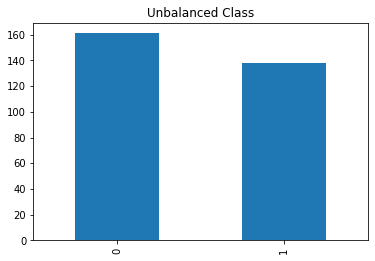

In [9]:
print(data['AHD'].value_counts())
a = data['AHD'].value_counts().plot(kind='bar', title='Unbalanced Class')
plt.show(a)

In [10]:
X=data[data.columns[:-1]]
Y=data['AHD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state = 42)
clf = svm.SVC(kernel = 'rbf')

Testing Misclassified samples when C = 0.1 : 37
Training Misclassified samples when C = 0.1 : 101


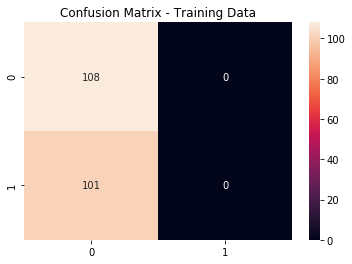

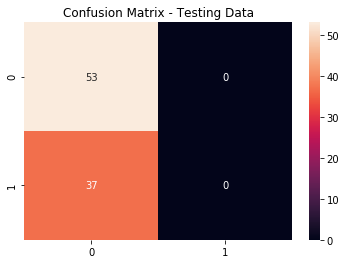

roc_auc_score :  0.5


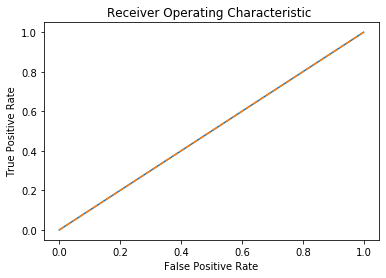

Testing Misclassified samples when C = 10 : 31
Training Misclassified samples when C = 10 : 54


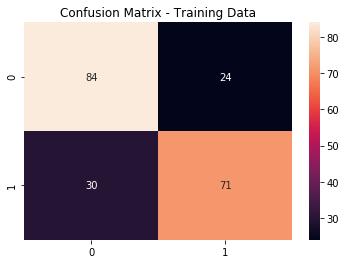

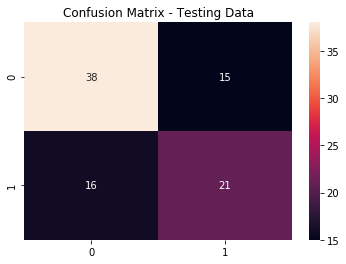

roc_auc_score :  0.6422743498215197


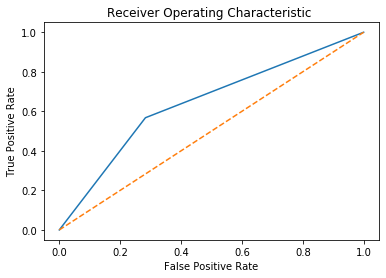

Testing Misclassified samples when C = 50 : 32
Training Misclassified samples when C = 50 : 55


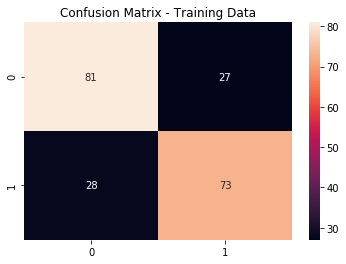

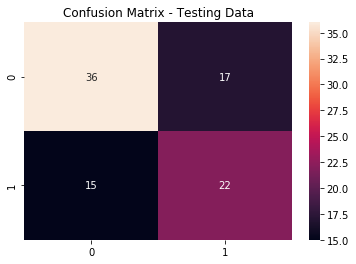

roc_auc_score :  0.6369199388067314


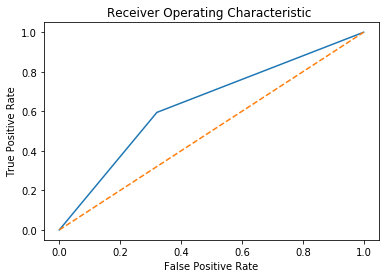

Testing Misclassified samples when C = 100 : 31
Training Misclassified samples when C = 100 : 50


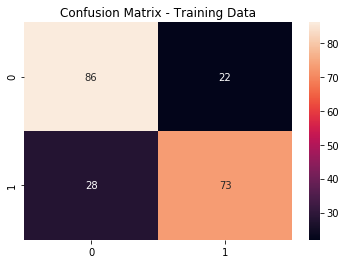

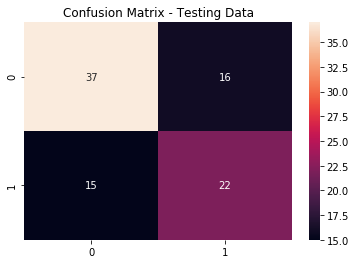

roc_auc_score :  0.6463539010708823


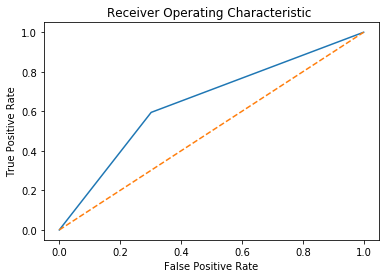

Testing Misclassified samples when C = 150 : 29
Training Misclassified samples when C = 150 : 49


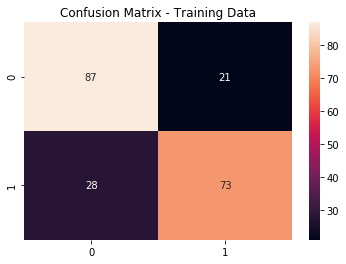

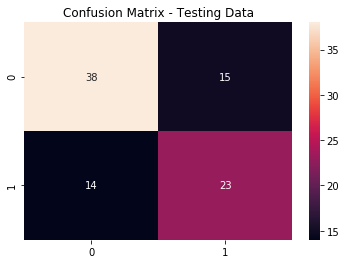

roc_auc_score :  0.6693013768485466


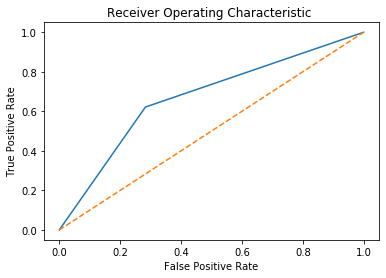

Training Accuracy: 
 [0.5167464114832536, 0.7416267942583732, 0.7368421052631579, 0.7607655502392344, 0.7655502392344498]
Testing Accuracy: 
 [0.5888888888888889, 0.6555555555555556, 0.6444444444444445, 0.6555555555555556, 0.6777777777777778]


In [11]:
C = [0.1, 10, 50, 100, 150]
training_accuracy= []
testing_accuracy = []
for c in C:
    clf.set_params(C=c)
    clf.fit(X_train, Y_train)
    #print(clf)
    Y_test_pred = clf.predict(X_test)
    Y_train_pred = clf.predict(X_train)
    count_misclassified = (Y_test != Y_test_pred).sum()
    print('Testing Misclassified samples when C = {} : {}'.format(c, count_misclassified))
    training_accuracy.append(metrics.accuracy_score(Y_train, Y_train_pred))
    count_misclassified = (Y_train != Y_train_pred).sum()
    print('Training Misclassified samples when C = {} : {}'.format(c, count_misclassified))
    testing_accuracy.append(metrics.accuracy_score(Y_test, Y_test_pred))
    
    
    #Confusion Matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title("Confusion Matrix - Training Data")
    cm = metrics.confusion_matrix(Y_train, Y_train_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show(ax)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.title("Confusion Matrix - Testing Data")
    cm = metrics.confusion_matrix(Y_test, Y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.show(ax)
    
    #ROC Curve
    false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test, Y_test_pred)
    import matplotlib.pyplot as plt
    print('roc_auc_score : ', roc_auc_score(Y_test, Y_test_pred))
    plt.title('Receiver Operating Characteristic ')
    plt.plot(false_positive_rate1, true_positive_rate1)
    plt.plot([0, 1], ls="--")
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
print("Training Accuracy: \n", training_accuracy)
print("Testing Accuracy: \n", testing_accuracy)

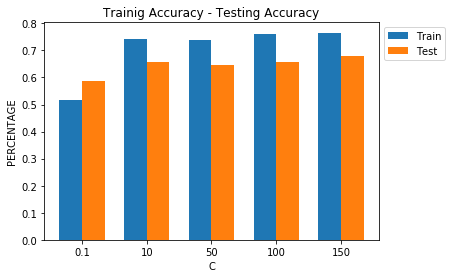

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(len(C))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, training_accuracy, width, label='Train')
rects2 = ax.bar(x + width/2, testing_accuracy, width, label='Test')
ax.set_ylabel('PERCENTAGE')
ax.set_xlabel('C')
ax.set_title('Trainig Accuracy - Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(C)
ax.legend(loc = 'best', bbox_to_anchor=(1, 1))
plt.show()

In [13]:
from sklearn.model_selection import GridSearchCV
params_grid = {'C': [0.1, 10, 50, 100, 150]}
s = GridSearchCV(clf, params_grid)
s.fit(X_train, Y_train)
print(s.best_params_)

{'C': 50}
